In [2]:
!pip install duckdb --target=/kaggle/working/mysitepackages

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.8/17.8 MB 55.0 MB/s eta 0:00:00:00:0100:01


In [3]:
import sys
sys.path.append('/kaggle/working/mysitepackages')

In [4]:
!ls /kaggle/working/mysitepackages/

adbc_driver_duckdb  duckdb  duckdb-0.10.0.dist-info  duckdb-stubs


In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/looker-ecommerce-bigquery-dataset/distribution_centers.csv
/kaggle/input/looker-ecommerce-bigquery-dataset/products.csv
/kaggle/input/looker-ecommerce-bigquery-dataset/users.csv
/kaggle/input/looker-ecommerce-bigquery-dataset/inventory_items.csv
/kaggle/input/looker-ecommerce-bigquery-dataset/order_items.csv
/kaggle/input/looker-ecommerce-bigquery-dataset/orders.csv
/kaggle/input/looker-ecommerce-bigquery-dataset/events.csv


In [6]:
distribution_center_df = pd.read_csv("/kaggle/input/looker-ecommerce-bigquery-dataset/distribution_centers.csv")
products_df = pd.read_csv("/kaggle/input/looker-ecommerce-bigquery-dataset/products.csv")
users_df = pd.read_csv("/kaggle/input/looker-ecommerce-bigquery-dataset/users.csv")
inventory_df = pd.read_csv("/kaggle/input/looker-ecommerce-bigquery-dataset/inventory_items.csv")
order_items = pd.read_csv("/kaggle/input/looker-ecommerce-bigquery-dataset/order_items.csv")
orders_df = pd.read_csv("/kaggle/input/looker-ecommerce-bigquery-dataset/orders.csv")
events_df = pd.read_csv("/kaggle/input/looker-ecommerce-bigquery-dataset/events.csv")

#### Exploratory Data Analysis ####

<h2><b> DON'T FORGET TO SORT EACH DF BY DATE </b></h2>

In [3]:
users_df.head()

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,457,Timothy,Bush,timothybush@example.net,65,M,Acre,87620 Johnson Hills,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2022-07-19 13:51:00+00:00
1,6578,Elizabeth,Martinez,elizabethmartinez@example.com,34,F,Acre,1705 Nielsen Land,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2023-11-08 18:49:00+00:00
2,36280,Christopher,Mendoza,christophermendoza@example.net,13,M,Acre,125 Turner Isle Apt. 264,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Email,2019-08-24 06:10:00+00:00
3,60193,Jimmy,Conner,jimmyconner@example.com,64,M,Acre,0966 Jose Branch Apt. 008,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2020-02-15 11:26:00+00:00
4,64231,Natasha,Wilson,natashawilson@example.net,25,F,Acre,20798 Phillip Trail Apt. 392,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2020-03-13 06:45:00+00:00


In [18]:
users_df.country.value_counts()

country
China             34150
United States     22522
Brasil            14507
South Korea        5316
France             4700
United Kingdom     4561
Germany            4155
Spain              4062
Japan              2438
Australia          2146
Belgium            1185
Poland              235
Colombia             17
Deutschland           2
España                2
Austria               2
Name: count, dtype: int64

In [4]:
inventory_df.head()

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,67971,13844,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
1,67972,13844,2023-12-20 03:28:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
2,67973,13844,2023-06-04 02:53:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
3,72863,13844,2021-10-16 22:58:52+00:00,2021-11-22 02:19:52+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
4,72864,13844,2021-08-07 16:33:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7


In [5]:
inventory_df.product_id.nunique()

29046

In [16]:
duckdb.query("Select product_id, count(product_id) as product_count FROM inventory_df GROUP BY product_id ORDER BY product_count DESC LIMIT 25")

┌────────────┬───────────────┐
│ product_id │ product_count │
│   int64    │     int64     │
├────────────┼───────────────┤
│      18795 │            58 │
│      27625 │            53 │
│      21086 │            52 │
│      17045 │            51 │
│      25209 │            51 │
│      23471 │            50 │
│      19871 │            50 │
│      14868 │            49 │
│      18968 │            49 │
│      28012 │            48 │
│        ·   │             · │
│        ·   │             · │
│        ·   │             · │
│      15056 │            46 │
│      21842 │            46 │
│      22945 │            46 │
│      20793 │            46 │
│      26235 │            46 │
│      24250 │            45 │
│       8344 │            45 │
│        818 │            45 │
│      20025 │            45 │
│      18296 │            45 │
├────────────┴───────────────┤
│     25 rows (20 shown)     │
└────────────────────────────┘

In [18]:
inventory_df[inventory_df['product_id']== 18296][:15]

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
37796,32755,18296,2023-07-18 08:01:24+00:00,2023-08-25 07:46:24+00:00,26.7,Active,IZOD Men's XFG Flat Front Microsanded Sportfle...,IZOD,60.0,Men,5F166BFF56D6B9E02E5351478EE99F49,4
37797,32756,18296,2023-09-30 09:44:00+00:00,NaN,26.7,Active,IZOD Men's XFG Flat Front Microsanded Sportfle...,IZOD,60.0,Men,5F166BFF56D6B9E02E5351478EE99F49,4
37798,32757,18296,2023-04-11 04:04:00+00:00,NaN,26.7,Active,IZOD Men's XFG Flat Front Microsanded Sportfle...,IZOD,60.0,Men,5F166BFF56D6B9E02E5351478EE99F49,4
37799,32758,18296,2021-01-30 12:31:00+00:00,NaN,26.7,Active,IZOD Men's XFG Flat Front Microsanded Sportfle...,IZOD,60.0,Men,5F166BFF56D6B9E02E5351478EE99F49,4
37800,45287,18296,2020-12-06 03:55:25+00:00,2021-01-17 13:13:25+00:00,26.7,Active,IZOD Men's XFG Flat Front Microsanded Sportfle...,IZOD,60.0,Men,5F166BFF56D6B9E02E5351478EE99F49,4
37801,45288,18296,2021-05-08 08:23:00+00:00,NaN,26.7,Active,IZOD Men's XFG Flat Front Microsanded Sportfle...,IZOD,60.0,Men,5F166BFF56D6B9E02E5351478EE99F49,4
37802,45289,18296,2020-05-02 16:01:00+00:00,NaN,26.7,Active,IZOD Men's XFG Flat Front Microsanded Sportfle...,IZOD,60.0,Men,5F166BFF56D6B9E02E5351478EE99F49,4
37803,45290,18296,2020-11-21 14:30:00+00:00,NaN,26.7,Active,IZOD Men's XFG Flat Front Microsanded Sportfle...,IZOD,60.0,Men,5F166BFF56D6B9E02E5351478EE99F49,4
37804,173334,18296,2022-07-08 07:01:33+00:00,2022-08-25 04:29:33+00:00,26.7,Active,IZOD Men's XFG Flat Front Microsanded Sportfle...,IZOD,60.0,Men,5F166BFF56D6B9E02E5351478EE99F49,4
37805,173335,18296,2023-11-17 01:01:00+00:00,NaN,26.7,Active,IZOD Men's XFG Flat Front Microsanded Sportfle...,IZOD,60.0,Men,5F166BFF56D6B9E02E5351478EE99F49,4


In [19]:
order_items.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaN,NaN,NaN,0.02
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaN,0.02
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaN,0.02
3,36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,NaN,NaN,0.02
4,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaN,NaN,0.02


In [22]:
products_df.head()

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,13842,2.51875,Accessories,Low Profile Dyed Cotton Twill Cap - Navy W39S55D,MG,6.25,Women,EBD58B8A3F1D72F4206201DA62FB1204,1
1,13928,2.33835,Accessories,Low Profile Dyed Cotton Twill Cap - Putty W39S55D,MG,5.95,Women,2EAC42424D12436BDD6A5B8A88480CC3,1
2,14115,4.87956,Accessories,Enzyme Regular Solid Army Caps-Black W35S45D,MG,10.99,Women,EE364229B2791D1EF9355708EFF0BA34,1
3,14157,4.64877,Accessories,Enzyme Regular Solid Army Caps-Olive W35S45D (...,MG,10.99,Women,00BD13095D06C20B11A2993CA419D16B,1
4,14273,6.50793,Accessories,Washed Canvas Ivy Cap - Black W11S64C,MG,15.99,Women,F531DC20FDE20B7ADF3A73F52B71D0AF,1


#### Analyzing user purchasing events ####

In [23]:
events_df.head()

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
0,2198523,NaN,3,83889ed2-2adc-4b9a-af5d-154f6998e778,2021-06-17 17:30:00+00:00,138.143.9.202,São Paulo,São Paulo,02675-031,Chrome,Adwords,/cancel,cancel
1,1773216,NaN,3,7a3fc3f2-e84f-44fe-8876-eff76741f7a3,2020-08-07 08:41:00+00:00,85.114.141.79,Santa Isabel,São Paulo,07500-000,Safari,Adwords,/cancel,cancel
2,2380515,NaN,3,13d9b2fb-eee1-43fd-965c-267b38dd7125,2021-02-15 18:48:00+00:00,169.250.255.132,Mairiporã,São Paulo,07600-000,IE,Adwords,/cancel,cancel
3,2250597,NaN,3,96f1d44e-9621-463c-954c-d8deb7fffe7f,2022-03-30 10:56:00+00:00,137.25.222.160,Cajamar,São Paulo,07750-000,Chrome,Adwords,/cancel,cancel
4,1834446,NaN,3,d09dce10-a7cb-47d3-a9af-44975566fa03,2019-09-05 01:18:00+00:00,161.114.4.174,São Paulo,São Paulo,09581-680,Chrome,Email,/cancel,cancel


In [8]:
events_df = events_df.sort_values(by=['created_at'])

In [9]:
events_df['created_at'] = pd.to_datetime(events_df['created_at'],format='mixed')

In [10]:
events_df['created_month'] = events_df.created_at.dt.month
events_df['created_day'] = events_df.created_at.dt.day
events_df['created_date'] = events_df.created_at.dt.date
events_df['created_year'] = events_df.created_at.dt.year

In [13]:
events_df.head()

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type,created_month,created_day,created_date,created_year
1234869,1438360,NaN,1,d63f8621-f5e9-4d9a-b6a7-5b48adc3b05c,2019-01-02 00:05:00+00:00,165.197.36.113,Zhengzhou,Shanxi,41000,Safari,Adwords,/product/19555,product,1,2,2019-01-02,2019
160142,1770247,NaN,1,6c229e08-3d5d-4323-9707-4588bef033c8,2019-01-02 00:24:00+00:00,145.154.167.33,Taizhou,Hebei,57350,Chrome,Facebook,/department/men/category/active/brand/columbia,department,1,2,2019-01-02,2019
541295,1770248,NaN,2,6c229e08-3d5d-4323-9707-4588bef033c8,2019-01-02 00:25:00+00:00,145.154.167.33,Taizhou,Hebei,57350,Chrome,Facebook,/product/18789,product,1,2,2019-01-02,2019
2347472,2380982,NaN,1,01ac765d-2bb6-4e2e-8502-b9a36fdcffcf,2019-01-02 00:26:00+00:00,167.160.250.220,New York,New York,11234,Firefox,Email,/product/24584,product,1,2,2019-01-02,2019
1204973,2128542,NaN,1,463fbb4c-6ccd-4c2a-a1c0-340920e2b402,2019-01-02 00:27:00+00:00,82.81.55.110,Bellingham,Washington,98226,Chrome,YouTube,/department/women/category/leggings/brand/queen,department,1,2,2019-01-02,2019


In [17]:
events_df.isnull().sum().sort_values(ascending=False)/(events_df.shape[0])

user_id            0.462865
city               0.009490
id                 0.000000
traffic_source     0.000000
created_date       0.000000
created_day        0.000000
created_month      0.000000
event_type         0.000000
uri                0.000000
postal_code        0.000000
browser            0.000000
state              0.000000
ip_address         0.000000
created_at         0.000000
session_id         0.000000
sequence_number    0.000000
created_year       0.000000
dtype: float64

In [19]:
events_df_non_null = events_df[events_df.user_id.isna()==False]

In [21]:
events_df_non_null.traffic_source.value_counts()

traffic_source
Email       586588
Adwords     392358
Facebook    131784
YouTube     130030
Organic      65532
Name: count, dtype: int64

<h5> Identify active users </h5>

In [28]:
duckdb.query("Select user_id, count(distinct(session_id)) as distinct_sessions FROM events_df_non_null Group By user_id Order by distinct_sessions DESC")

┌─────────┬───────────────────┐
│ user_id │ distinct_sessions │
│ double  │       int64       │
├─────────┼───────────────────┤
│ 32996.0 │                14 │
│ 80952.0 │                13 │
│ 80546.0 │                13 │
│ 46712.0 │                12 │
│ 33086.0 │                12 │
│ 34249.0 │                12 │
│ 96772.0 │                12 │
│ 19415.0 │                12 │
│ 76121.0 │                12 │
│ 57419.0 │                12 │
│    ·    │                 · │
│    ·    │                 · │
│    ·    │                 · │
│ 25057.0 │                 4 │
│  9781.0 │                 4 │
│ 44101.0 │                 4 │
│ 45531.0 │                 4 │
│ 31526.0 │                 4 │
│ 87040.0 │                 4 │
│ 17932.0 │                 4 │
│ 79494.0 │                 4 │
│  6358.0 │                 4 │
│ 22965.0 │                 4 │
├─────────┴───────────────────┤
│ ? rows            2 columns │
└─────────────────────────────┘

In [31]:
duckdb.query("Select distinct(session_id) FROM events_df_non_null where user_id = 2721.0")

┌──────────────────────────────────────┐
│              session_id              │
│               varchar                │
├──────────────────────────────────────┤
│ d3a47f91-e629-4530-a599-62858b4a7959 │
│ 89b09ad6-63dc-4dab-b387-c253973d893a │
│ d453eccd-691c-4542-9b02-7912d0f34c58 │
│ 9a2c8f96-9db8-4568-9041-f58beaba4a0c │
│ 0c5e8784-f3ca-4409-8847-c50058e9d33d │
│ 7c370ce6-e7a5-4746-ac10-aa5bee1d2fdd │
└──────────────────────────────────────┘

In [30]:
events_df_non_null[events_df_non_null.session_id=='189ea28d-bbd3-4383-b653-ed56d09daeb3']

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type,created_month,created_day,created_date,created_year
1299922,430417,32996.0,1,189ea28d-bbd3-4383-b653-ed56d09daeb3,2024-01-04 12:59:20+00:00,111.137.163.227,Hamburg,Hamburg,22587,Safari,Facebook,/department/men/category/tops&tees/brand/calvi...,department,1,4,2024-01-04,2024
1605225,430418,32996.0,2,189ea28d-bbd3-4383-b653-ed56d09daeb3,2024-01-04 13:00:03+00:00,111.137.163.227,Hamburg,Hamburg,22587,Safari,Facebook,/product/16588,product,1,4,2024-01-04,2024
324660,430419,32996.0,3,189ea28d-bbd3-4383-b653-ed56d09daeb3,2024-01-04 13:02:12+00:00,111.137.163.227,Hamburg,Hamburg,22587,Safari,Facebook,/cart,cart,1,4,2024-01-04,2024
480264,430420,32996.0,4,189ea28d-bbd3-4383-b653-ed56d09daeb3,2024-01-04 13:02:22+00:00,111.137.163.227,Hamburg,Hamburg,22587,Safari,Facebook,/department/men/category/tops&tees/brand/calvi...,department,1,4,2024-01-04,2024
1853212,430421,32996.0,5,189ea28d-bbd3-4383-b653-ed56d09daeb3,2024-01-04 13:04:55+00:00,111.137.163.227,Hamburg,Hamburg,22587,Safari,Facebook,/product/16588,product,1,4,2024-01-04,2024
648273,430422,32996.0,6,189ea28d-bbd3-4383-b653-ed56d09daeb3,2024-01-04 13:07:24+00:00,111.137.163.227,Hamburg,Hamburg,22587,Safari,Facebook,/cart,cart,1,4,2024-01-04,2024
1299921,430423,32996.0,7,189ea28d-bbd3-4383-b653-ed56d09daeb3,2024-01-04 13:08:42+00:00,111.137.163.227,Hamburg,Hamburg,22587,Safari,Facebook,/department/men/category/tops&tees/brand/calvi...,department,1,4,2024-01-04,2024
1952164,430424,32996.0,8,189ea28d-bbd3-4383-b653-ed56d09daeb3,2024-01-04 13:11:01+00:00,111.137.163.227,Hamburg,Hamburg,22587,Safari,Facebook,/product/16588,product,1,4,2024-01-04,2024
449290,430425,32996.0,9,189ea28d-bbd3-4383-b653-ed56d09daeb3,2024-01-04 13:11:22+00:00,111.137.163.227,Hamburg,Hamburg,22587,Safari,Facebook,/cart,cart,1,4,2024-01-04,2024
878401,430426,32996.0,10,189ea28d-bbd3-4383-b653-ed56d09daeb3,2024-01-04 13:14:05+00:00,111.137.163.227,Hamburg,Hamburg,22587,Safari,Facebook,/department/men/category/tops&tees/brand/calvi...,department,1,4,2024-01-04,2024


In [24]:
events_df_non_null[(events_df_non_null.traffic_source=='Facebook') & (events_df_non_null.user_id==2721.0)]

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type,created_month,created_day,created_date,created_year
1155629,35363,2721.0,1,89b09ad6-63dc-4dab-b387-c253973d893a,2019-01-15 06:58:46+00:00,222.61.240.192,Lakeside,California,92040,Chrome,Facebook,/department/women/category/socks&hosiery/brand...,department,1,15,2019-01-15,2019
2354806,35364,2721.0,2,89b09ad6-63dc-4dab-b387-c253973d893a,2019-01-15 07:01:43+00:00,222.61.240.192,Lakeside,California,92040,Chrome,Facebook,/product/9191,product,1,15,2019-01-15,2019
2265180,35365,2721.0,3,89b09ad6-63dc-4dab-b387-c253973d893a,2019-01-15 07:02:15+00:00,222.61.240.192,Lakeside,California,92040,Chrome,Facebook,/cart,cart,1,15,2019-01-15,2019
12853,35366,2721.0,4,89b09ad6-63dc-4dab-b387-c253973d893a,2019-01-15 07:04:54+00:00,222.61.240.192,Lakeside,California,92040,Chrome,Facebook,/department/women/category/socks&hosiery/brand...,department,1,15,2019-01-15,2019
1660661,35367,2721.0,5,89b09ad6-63dc-4dab-b387-c253973d893a,2019-01-15 07:07:38+00:00,222.61.240.192,Lakeside,California,92040,Chrome,Facebook,/product/9191,product,1,15,2019-01-15,2019
1918039,35368,2721.0,6,89b09ad6-63dc-4dab-b387-c253973d893a,2019-01-15 07:08:29+00:00,222.61.240.192,Lakeside,California,92040,Chrome,Facebook,/cart,cart,1,15,2019-01-15,2019
1353837,35369,2721.0,7,89b09ad6-63dc-4dab-b387-c253973d893a,2019-01-15 07:10:35+00:00,222.61.240.192,Lakeside,California,92040,Chrome,Facebook,/department/women/category/socks&hosiery/brand...,department,1,15,2019-01-15,2019
2181448,35370,2721.0,8,89b09ad6-63dc-4dab-b387-c253973d893a,2019-01-15 07:12:15+00:00,222.61.240.192,Lakeside,California,92040,Chrome,Facebook,/product/9191,product,1,15,2019-01-15,2019
1620677,35371,2721.0,9,89b09ad6-63dc-4dab-b387-c253973d893a,2019-01-15 07:12:58+00:00,222.61.240.192,Lakeside,California,92040,Chrome,Facebook,/cart,cart,1,15,2019-01-15,2019
1911147,35372,2721.0,10,89b09ad6-63dc-4dab-b387-c253973d893a,2019-01-17 07:13:13+00:00,222.61.240.192,Lakeside,California,92040,Chrome,Facebook,/purchase,purchase,1,17,2019-01-17,2019


#### Project Report ####

In [3]:
orders_df.head()

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaN,NaN,NaN,3
1,60,44,Cancelled,F,2023-01-20 02:12:00+00:00,NaN,NaN,NaN,1
2,64,46,Cancelled,F,2021-12-06 09:11:00+00:00,NaN,NaN,NaN,1
3,89,65,Cancelled,F,2020-08-13 09:58:00+00:00,NaN,NaN,NaN,1
4,102,76,Cancelled,F,2023-01-17 08:17:00+00:00,NaN,NaN,NaN,2


In [5]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125226 entries, 0 to 125225
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   order_id      125226 non-null  int64 
 1   user_id       125226 non-null  int64 
 2   status        125226 non-null  object
 3   gender        125226 non-null  object
 4   created_at    125226 non-null  object
 5   returned_at   12530 non-null   object
 6   shipped_at    81461 non-null   object
 7   delivered_at  43884 non-null   object
 8   num_of_item   125226 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 8.6+ MB


In [6]:
orders_df.shape

(125226, 9)

In [7]:
orders_df.describe()

,order_id,user_id,num_of_item
count,125226.000000,125226.000000,125226.000000
mean,62613.500000,50010.104355,1.451448
std,36149.776742,28849.881537,0.808190
min,1.000000,1.000000,1.000000
25%,31307.250000,25062.250000,1.000000
50%,62613.500000,50051.000000,1.000000
75%,93919.750000,74918.750000,2.000000
max,125226.000000,100000.000000,4.000000


In [4]:
orders_df.status.value_counts()

status
Shipped       37577
Complete      31354
Processing    25156
Cancelled     18609
Returned      12530
Name: count, dtype: int64

In [10]:
orders_df['created_at'] = pd.to_datetime(orders_df['created_at'],format='mixed')

0        2022-10-20 10:03:00+00:00
1        2023-01-20 02:12:00+00:00
2        2021-12-06 09:11:00+00:00
3        2020-08-13 09:58:00+00:00
4        2023-01-17 08:17:00+00:00
                    ...           
125221   2022-06-25 11:56:00+00:00
125222   2022-07-20 02:19:00+00:00
125223   2022-03-14 15:06:00+00:00
125224   2023-03-01 15:06:00+00:00
125225   2023-12-22 11:29:00+00:00
Name: created_at, Length: 125226, dtype: datetime64[ns, UTC]

In [23]:
orders_df = orders_df.sort_values(by=['created_at'])

In [24]:
orders_df

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item,created_at_year,created_at_month,created_at_day
48369,29835,23839,Shipped,F,2019-01-06 05:30:00+00:00,NaN,2019-01-09 04:36:00+00:00,NaN,3,2019,1,6
8532,115297,92102,Cancelled,F,2019-01-07 03:48:00+00:00,NaN,NaN,NaN,1,2019,1,7
96255,85009,67807,Processing,M,2019-01-11 18:46:00+00:00,NaN,NaN,NaN,1,2019,1,11
60947,113832,90910,Shipped,F,2019-01-13 05:52:00+00:00,NaN,2019-01-14 02:05:00+00:00,NaN,3,2019,1,13
34967,99855,79719,Processing,F,2019-01-14 00:18:00+00:00,NaN,NaN,NaN,1,2019,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...
115295,59225,47322,Shipped,M,2024-01-17 19:31:33.029124+00:00,NaN,2024-01-18 14:03:33.029124+00:00,NaN,1,2024,1,17
21639,98982,78978,Complete,F,2024-01-17 19:41:42.220676+00:00,NaN,2024-01-20 01:42:42.220676+00:00,2024-01-24 22:14:42.220676+00:00,2,2024,1,17
22001,102047,81458,Complete,F,2024-01-17 19:42:04.500482+00:00,NaN,2024-01-18 17:30:04.500482+00:00,2024-01-23 14:10:04.500482+00:00,2,2024,1,17
71170,113136,90357,Cancelled,M,2024-01-17 19:45:55.835637+00:00,NaN,NaN,NaN,1,2024,1,17


In [16]:
orders_df['created_at_year'] = orders_df['created_at'].dt.year
orders_df['created_at_month'] = orders_df['created_at'].dt.month
orders_df['created_at_day'] = orders_df['created_at'].dt.day
orders_df['created_at_date'] = orders_df['created_at'].dt.date

order_df_orders_received = order_df.groupby(['created_at_year','created_at_month'])['order_id'].count()

In [46]:
plot_data = orders_df.loc[(orders_df['status']=='Cancelled') | (orders_df['status']=='Returned'),['order_id','created_at_date']]

In [47]:
orders_df_orders_received = plot_data.groupby(['created_at_date'])['order_id'].count()

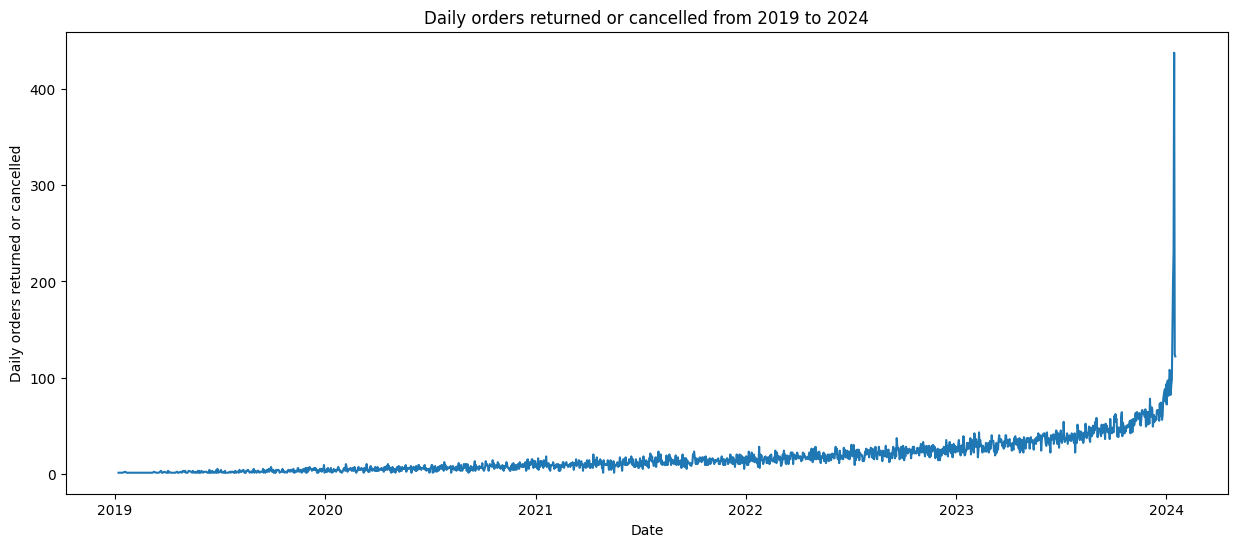

In [49]:
plt.figure(figsize=(15,6))
orders_df_orders_received.plot(kind='line')
plt.xlabel("Date")
plt.ylabel("Daily orders returned or cancelled")
plt.title("Daily orders returned or cancelled from 2019 to 2024")
plt.show()